In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir('/content/drive/MyDrive/통신망해커톤/Q1_data')
os.getcwd()

'/content/drive/MyDrive/통신망해커톤/Q1_data'

#데이터 불러오기

In [15]:
# 파일경로 수정해서 사용할 것
train = pd.read_csv('Q1_tr_최종전처리.csv')
test = pd.read_csv('Q1_te_최종전처리.csv')

#EDA

In [19]:
train.shape # 137428 행 65 열

(137428, 65)

In [20]:
test.shape #34362 행 64 열

(34362, 64)

In [24]:
train.columns #열 확인

Index(['ru_id', 'scgfail', 'scgfailratio', 'erabaddatt', 'erabaddsucc',
       'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc',
       'endcmodbysgnbatt', 'endcmodbysgnbsucc', 'connestabatt',
       'connestabsucc', 'redirectiontolte_coverageout',
       'redirectiontolte_epsfallback', 'redirectiontolte_emergencyfallback',
       'handoveratt', 'handoversucc', 'reestabatt', 'reestabsucc', 'rlculbyte',
       'rlcdlbyte', 'totprbulavg', 'totprbdlavg', 'dlreceivedriavg',
       'dltransmittedmcsavg', 'airmaculbyte', 'airmacdlbyte', 'bler_ul',
       'bler_dl', 'rachpreamblea', 'numrar', 'nummsg3', 'attpaging',
       'rssipathavg', 'dlreceivedcqiavg', 'endcrelbymenb', 'scgtry',
       'erabadd_r', 'endcadd_r', 'endcmodbymenb_r', 'endcmodbysgnb_r',
       'connestab_r', 'handover_r', 'reestab_r', 'rlculbyte_diff',
       'rlcdlbyte_diff', 'totprbulavg_diff', 'totprbdlavg_diff',
       'dlreceivedriavg_diff', 'dltransmittedmcsavg_diff', 'airmaculbyte_diff',
       'air

In [16]:
train.isna().sum() # 결측치확인

ru_id           0
scgfail         0
scgfailratio    0
erabaddatt      0
erabaddsucc     0
               ..
month           0
date            0
time_h          0
holiday         0
zero            0
Length: 65, dtype: int64

In [21]:
test.isna().sum() # 결측치확인

ru_id           0
scgfail         0
scgfailratio    0
erabaddatt      0
erabaddsucc     0
               ..
month           0
date            0
time_h          0
holiday         0
zero            0
Length: 64, dtype: int64

In [17]:
train.head(3) # 시계열 데이터

,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,...,endcrelbymenb_diff,nummsg3_diff,dlreceivedcqiavg_diff,rachpreamblea_diff,uenomax,month,date,time_h,holiday,zero
0,BaseStationG,-0.588317,-0.585882,-0.259173,-0.258956,-0.255230,-0.255116,-1.204427,-1.204123,-1.081151,...,0.010985,0.0,-0.4,0.428695,2,5,19,0,0,5
1,BaseStationE,-0.588317,-0.585882,-0.048468,-0.048243,0.092797,0.092919,0.767547,0.768275,0.765998,...,-0.443334,-15.0,0.1,-1.496715,4,5,19,0,0,0
2,BaseStationF,-0.588317,-0.585882,0.870502,0.870756,0.877231,0.877358,0.233435,0.234220,0.714568,...,-0.139592,-11.0,-1.0,-0.495016,7,5,19,0,0,1


In [23]:
train['ru_id'].value_counts()

BaseStationI    17180
BaseStationD    17180
BaseStationC    17180
BaseStationA    17180
BaseStationH    17180
BaseStationG    17176
BaseStationE    17176
BaseStationF    17176
Name: ru_id, dtype: int64

In [22]:
test['ru_id'].value_counts() # train set에 없는 BaseStation이 포함되어있음.

BaseStationJ    17181
BaseStationB    17181
Name: ru_id, dtype: int64

# 각 변수 time series plot

In [28]:
# BaseStation 별로 데이터프레임 분리
grouped = train.groupby('ru_id')
dfs = []
for name, group in grouped:
    dfs.append(group)
t1,t2,t3,t4,t5,t6,t7,t8 = dfs

In [29]:
grouped = test.groupby('ru_id')
dfs_test = []
for name, group in grouped:
    dfs_test.append(group)
T1,T2 = dfs_test

In [30]:
t_list=[t1,t2,t3,t4,t5,t6,t7,t8,T1,T2]

In [43]:
col_list = list(train.columns)
col_list = col_list[2:-7]

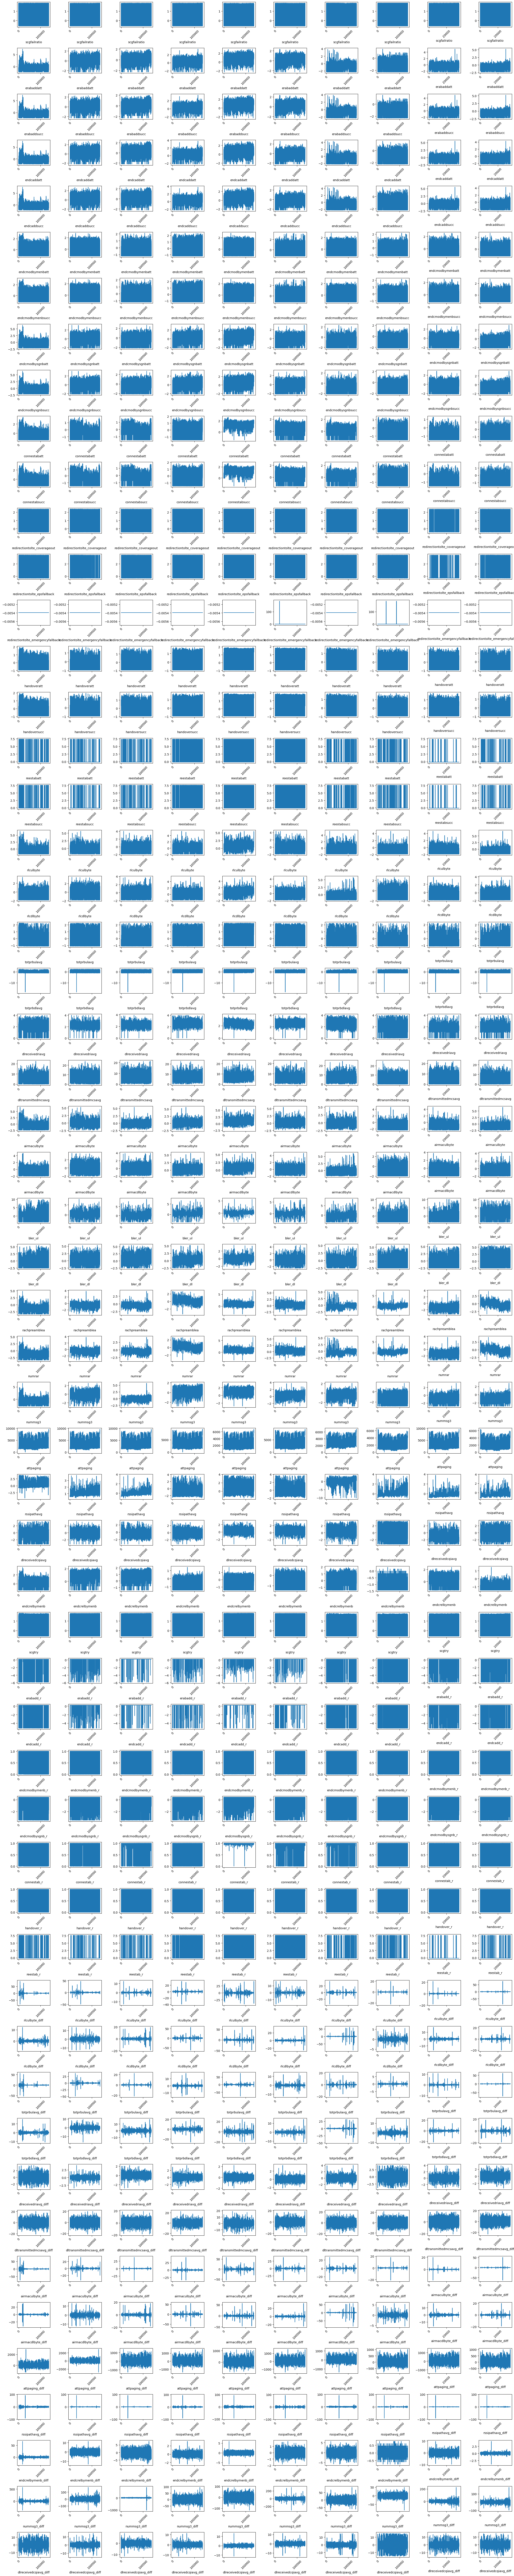

In [44]:
j=0
plt.figure(figsize=(24,120))
for col in col_list:
  for i in range(10):
    plt.subplot(len(col_list),10,j+1)
    plt.plot(t_list[i][col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    j+=1

plt.tight_layout()
plt.show()

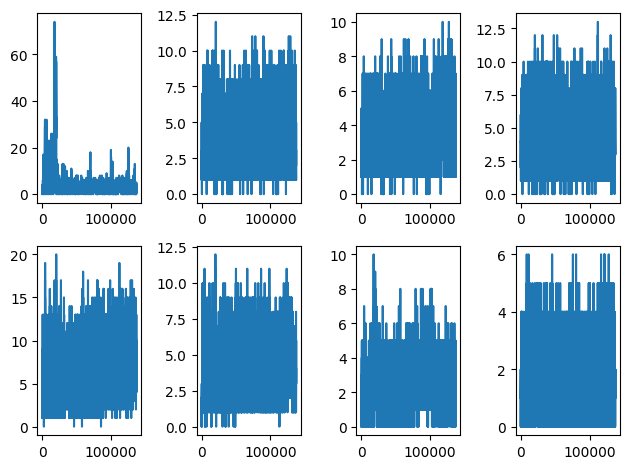

In [50]:
j=0
for i in t_list[0:8]:
  plt.subplot(2,4,j+1)
  plt.plot(i['uenomax'])
  j+=1

plt.tight_layout()
plt.show()
# BaseStation A에서 uenomax값에 큰 값이 많음.